<a href="https://colab.research.google.com/github/OscarDavidR/API-REST/blob/main/Accidentes%20de%20tr%C3%A1fico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Leer el archivo CSV
df = pd.read_csv('/content/traffic_accidents_biased.csv')

# Mostrar las primeras filas del dataset
print("\nPrimeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
         crash_date traffic_control_device weather_condition  \
0   7/29/2023 13:00         TRAFFIC SIGNAL             CLEAR   
1    8/13/2023 0:11         TRAFFIC SIGNAL             CLEAR   
2   12/9/2021 10:30         TRAFFIC SIGNAL             CLEAR   
3   8/19/2023 14:55         TRAFFIC SIGNAL             CLEAR   
4  12/20/2022 11:45         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT         REAR END  T-INTERSECTION   
4                DAYLIGHT    REAR TO FRONT        FOUR WAY   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2  STRAIGHT AND LEVEL                  

In [13]:
# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())




Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188376 entries, 0 to 188375
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     188376 non-null  object 
 1   traffic_control_device         187946 non-null  object 
 2   weather_condition              187946 non-null  object 
 3   lighting_condition             187946 non-null  object 
 4   first_crash_type               187946 non-null  object 
 5   trafficway_type                187946 non-null  object 
 6   alignment                      187946 non-null  object 
 7   roadway_surface_cond           187946 non-null  object 
 8   road_defect                    187946 non-null  object 
 9   crash_type                     187946 non-null  object 
 10  intersection_related_i         187946 non-null  object 
 11  damage                         187946 non-null  object 
 12  prim

In [14]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(df.describe())




Resumen estadístico:
           num_units  injuries_total  injuries_fatal  injuries_incapacitating  \
count  187946.000000   187946.000000    187946.00000            187946.000000   
mean        2.062991        0.382365         0.00183                 0.038112   
std         0.395304        0.799790         0.04735                 0.234759   
min         1.000000        0.000000         0.00000                 0.000000   
25%         2.000000        0.000000         0.00000                 0.000000   
50%         2.000000        0.000000         0.00000                 0.000000   
75%         2.000000        1.000000         0.00000                 0.000000   
max        11.000000       21.000000         3.00000                 7.000000   

       injuries_non_incapacitating  injuries_reported_not_evident  \
count                187946.000000                  187946.000000   
mean                      0.221191                       0.121232   
std                       0.615109       

In [15]:
# Identificación de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())




Valores nulos por columna:
crash_date                         0
traffic_control_device           430
weather_condition                430
lighting_condition               430
first_crash_type                 430
trafficway_type                  430
alignment                        430
roadway_surface_cond             430
road_defect                      430
crash_type                       430
intersection_related_i           430
damage                           430
prim_contributory_cause          430
num_units                        430
most_severe_injury               430
injuries_total                   430
injuries_fatal                   430
injuries_incapacitating          430
injuries_non_incapacitating      430
injuries_reported_not_evident    430
injuries_no_indication           430
crash_hour                       430
crash_day_of_week                430
crash_month                      430
dtype: int64


In [16]:
# Cantidad de registros únicos por columna
print("\nCantidad de registros únicos:")
print(df.nunique())


Cantidad de registros únicos:
crash_date                       171817
traffic_control_device               19
weather_condition                    12
lighting_condition                    6
first_crash_type                     18
trafficway_type                      20
alignment                             6
roadway_surface_cond                  7
road_defect                           7
crash_type                            2
intersection_related_i                2
damage                                3
prim_contributory_cause              40
num_units                            11
most_severe_injury                    5
injuries_total                       18
injuries_fatal                        4
injuries_incapacitating               8
injuries_non_incapacitating          18
injuries_reported_not_evident        13
injuries_no_indication               39
crash_hour                           24
crash_day_of_week                     7
crash_month                          12
dtype: in

In [27]:
# Calcular cuartiles y rango intercuartílico (IQR) solo para columnas numéricas
numeric_cols = df.select_dtypes(include=['number'])
Q1 = numeric_cols.quantile(0.25)
Q2 = numeric_cols.quantile(0.50)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
lower_IQR = Q1 - 1.5 * IQR
upper_IQR = Q3 + 1.5 * IQR

print("\nCuartiles y Rango Intercuartílico:")
print(f"Q1:\n{Q1}\n")
print(f"Q2 (Mediana):\n{Q2}\n")
print(f"Q3:\n{Q3}\n")
print(f"IQR:\n{IQR}\n")
print(f"Lower IQR:\n{lower_IQR}\n")
print(f"Upper IQR:\n{upper_IQR}\n")



Cuartiles y Rango Intercuartílico:
Q1:
num_units                        2.0
injuries_total                   0.0
injuries_fatal                   0.0
injuries_incapacitating          0.0
injuries_non_incapacitating      0.0
injuries_reported_not_evident    0.0
injuries_no_indication           2.0
crash_hour                       9.0
crash_day_of_week                2.0
crash_month                      4.0
Name: 0.25, dtype: float64

Q2 (Mediana):
num_units                         2.0
injuries_total                    0.0
injuries_fatal                    0.0
injuries_incapacitating           0.0
injuries_non_incapacitating       0.0
injuries_reported_not_evident     0.0
injuries_no_indication            2.0
crash_hour                       14.0
crash_day_of_week                 4.0
crash_month                       7.0
Name: 0.5, dtype: float64

Q3:
num_units                         2.0
injuries_total                    1.0
injuries_fatal                    0.0
injuries_incapacitating

In [28]:
# Detección de valores atípicos
outliers = (numeric_cols < lower_IQR) | (numeric_cols > upper_IQR)
print("\nCantidad de valores atípicos por columna:")
print(outliers.sum())


Cantidad de valores atípicos por columna:
num_units                        17887
injuries_total                    5096
injuries_fatal                     309
injuries_incapacitating           5942
injuries_non_incapacitating      29610
injuries_reported_not_evident    16760
injuries_no_indication           14579
crash_hour                           0
crash_day_of_week                    0
crash_month                          0
dtype: int64


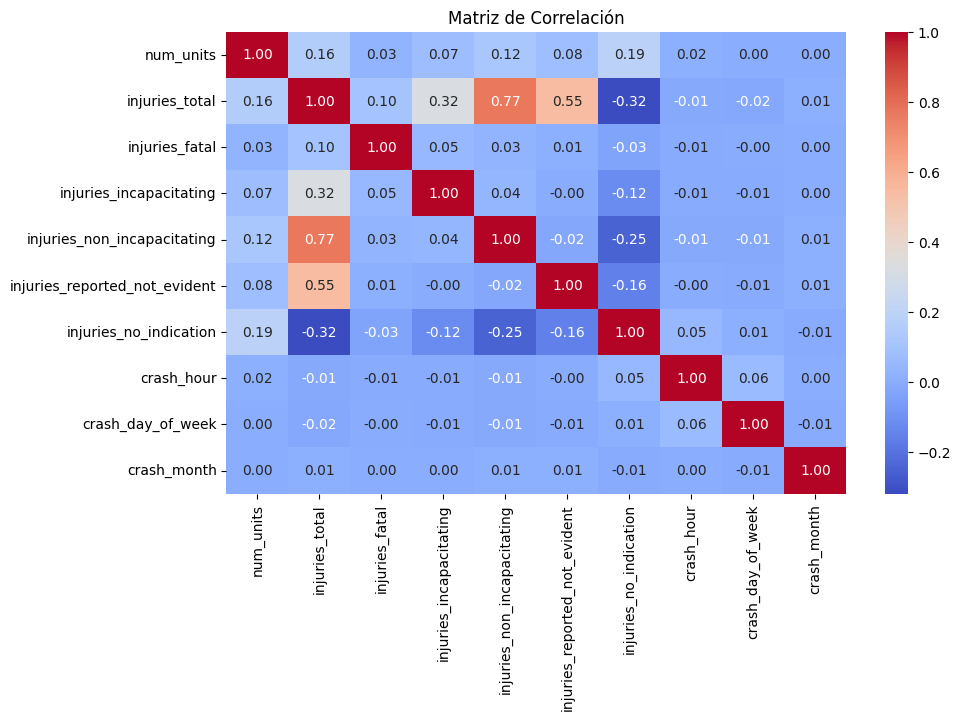

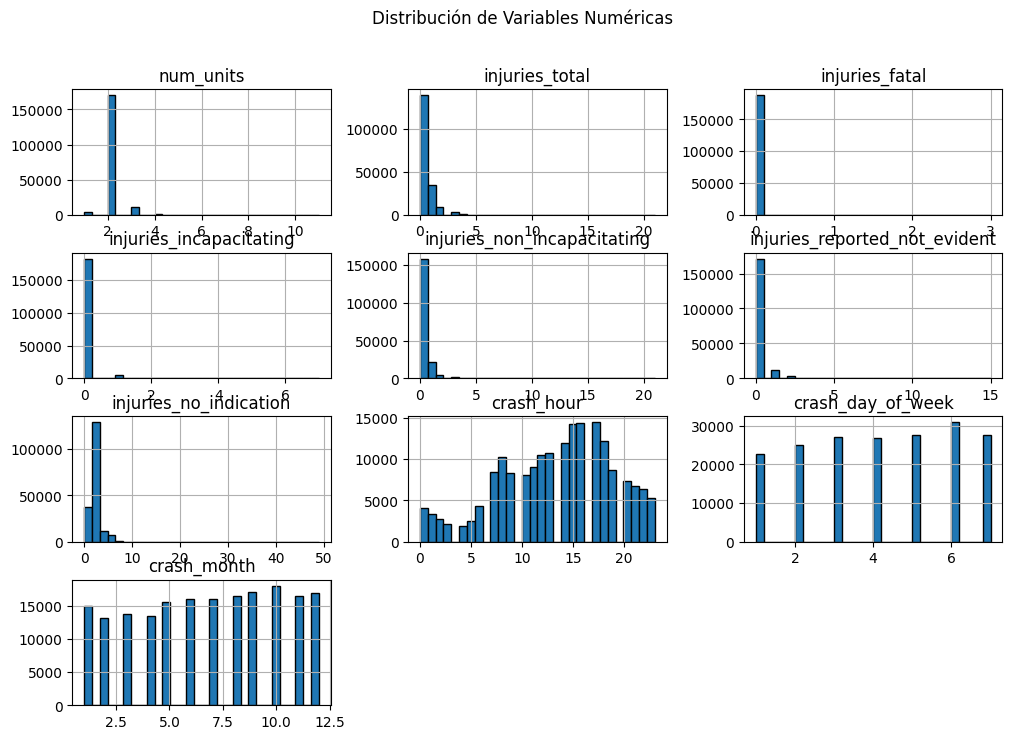

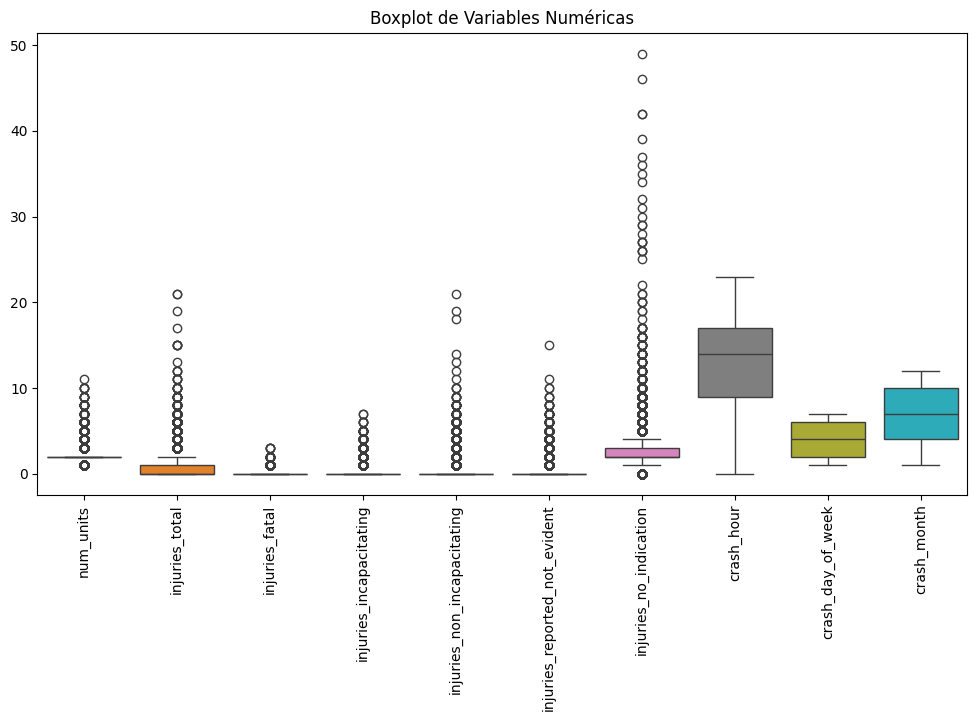

In [29]:
# Visualización de datos
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Histograma de todas las variables numéricas
numeric_cols.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

# Boxplot para identificar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=90)
plt.title('Boxplot de Variables Numéricas')
plt.show()
